<div  style="display: table; width: 100%; color: #034ea2; background:#ffffff ; line-height: 100px;  text-align: center;" dir="rtl">
        <h2 style="display:table-cell;">جامعة القلمون  </h2>
        <h1 style="display:table-cell;"> <b>👨‍💻 اويس الحمود 👨‍💻</b></h1>
        <h2 style="display:table-cell;">201811330</h2>
    </div>

In [91]:
from rdflib import URIRef, BNode, Literal, Namespace,Graph
from rdflib.namespace import FOAF, DCTERMS, XSD, RDF, SDO

<ul>
<li>me has fullname owis alhammoud in english </li>
<li>me has fullname اويس الحمود  in arabic </li>
<li>me born in 2001-2-2 </li>
<li>me study at UOK </li>
<li>uok locate at syria </li>
<li>syria is arabic country </li>
<li>syria has 28 million population </li>
<li>me study IT Engineering </li>
<li>me live in damascus </li>
<li>damascus locate in syria</li>

</ul>

Literals

In [92]:
nameAR=Literal('اويس الحمود',lang='ar')
nameEN=Literal('owis alhammoud',lang='en')
birthday=Literal('2001-2-8',datatype=XSD['date'])
populationNumber=Literal('28000000',datatype=XSD['int'])

NameSpaces

In [93]:
a=Namespace('http://aaa.com/reigon/')
b=Namespace('http://bbb.com/')
predicts=Namespace('http://aaa.com/predicts/')

URIReferences

In [94]:
me=URIRef('http://exceptionalPeople.com/aoueesAH')

node define

In [95]:
uok=a['uok']
syria=a['syria']
damascus=a['damascus']

arabicCountry=b['arabicCountry']
itEngineering=b['ITEngineering']

edge define

In [96]:
fullname=predicts['fullname']
bornIn=predicts['bornIN']
study=predicts['study']
studyAT=predicts['studyAT']
liveIN=predicts['liveIN']
locate=predicts['locateAT']
isA=predicts['isA']
hasNumberPopulation=predicts['hasPopulation']

define graph and bind the nameSpaces

In [97]:
g=Graph()
g.bind('a',a)
g.bind('XSD',XSD)
g.bind('b',b)
g.bind('predicts',predicts)

add nodes and edges to graph

In [98]:
g.add((me,fullname,nameAR))
g.add((me,fullname,nameEN))
g.add((me,bornIn,birthday))
g.add((me,studyAT,uok))
g.add((me,study,itEngineering))
g.add((me,liveIN,damascus))
g.add((damascus,locate,syria))
g.add((uok,locate,syria))
g.add((syria,hasNumberPopulation,populationNumber))
g.add((syria,isA,arabicCountry))

<Graph identifier=N05dbb7808ef4406eb9dae7a64518e57b (<class 'rdflib.graph.Graph'>)>

In [99]:
print(g.serialize(format='ttl'))

@prefix XSD: <http://www.w3.org/2001/XMLSchema#> .
@prefix a: <http://aaa.com/reigon/> .
@prefix b: <http://bbb.com/> .
@prefix predicts: <http://aaa.com/predicts/> .

<http://exceptionalPeople.com/aoueesAH> predicts:bornIN "2001-01-01"^^XSD:date ;
    predicts:fullname "اويس الحمود"@ar,
        "owis alhammoud"@en ;
    predicts:liveIN a:damascus ;
    predicts:study b:ITEngineering ;
    predicts:studyAT a:uok .

a:damascus predicts:locateAT a:syria .

a:uok predicts:locateAT a:syria .

a:syria predicts:hasPopulation "28000000"^^XSD:int ;
    predicts:isA b:arabicCountry .




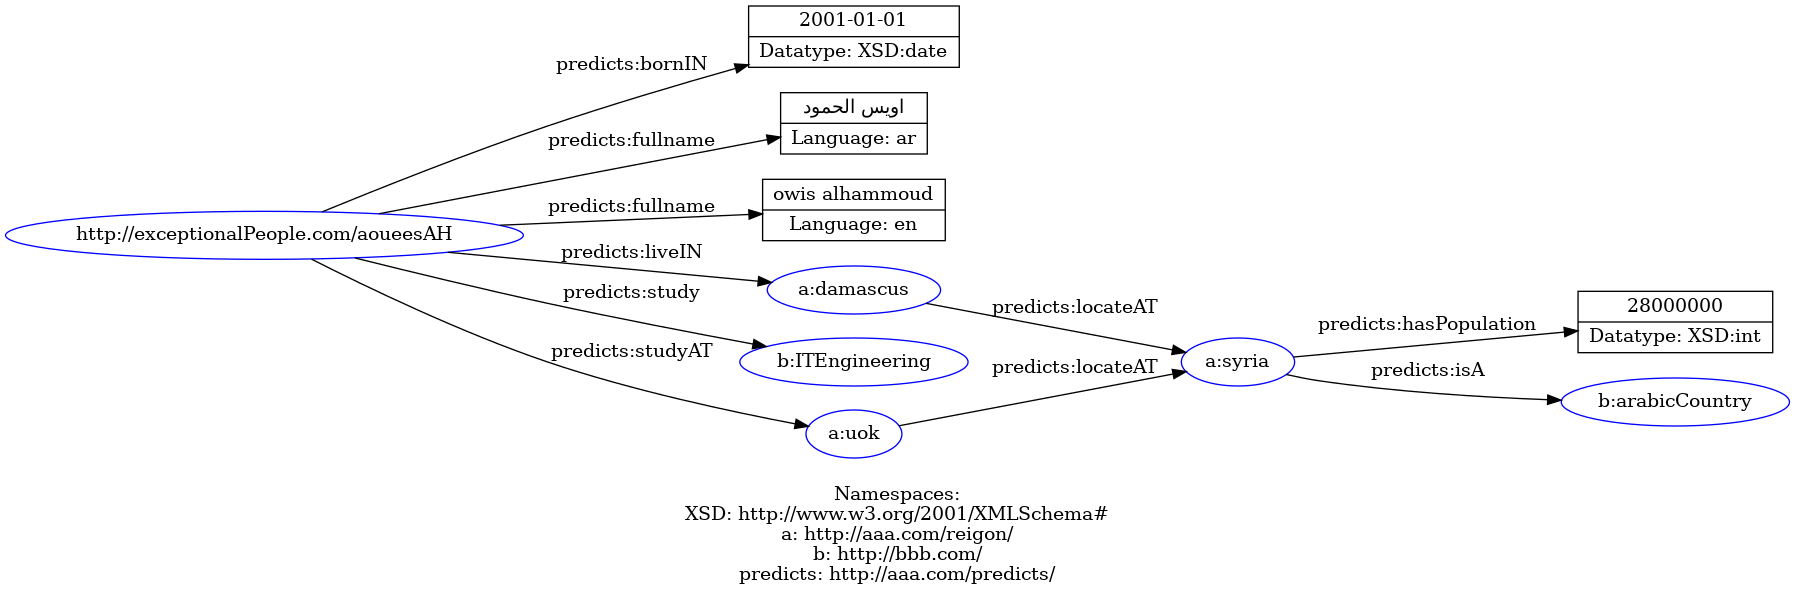

In [100]:
import requests
from IPython.display import Image
params = {
    'rdf': g.serialize(format='ttl'),
    'from': 'ttl',
    'to':'png'
    }
response = requests.get('http://www.ldf.fi/service/rdf-grapher',params=params)
img = Image(response.content)
display(img)